# Imports

In [1]:
from torch.utils.data import DataLoader, random_split
import torch
from data import PermutationDataset
from model import PermutationModel
from train import train_one_epoch, evaluate_model
import matplotlib.pyplot as plt

# Parameters
This includes parameters for what to train on and predict, and also the hyperparameters for training.

In [2]:
n = 5
label_name = "stat5"
layers = [n*(n-1)//2 + 1]

epochs = 1000
train_split, test_split = 0.8, 0.2
learning_rate = 0.001
momentum = 0.9
batch_size = 64

# Initialization
Initialize the data loaders, model, loss function, optimizers.

In [3]:
full_dataset = PermutationDataset(n, label_name)
training_dataset, test_dataset = random_split(full_dataset, [train_split, test_split])
model = PermutationModel(n, layers)
loss_fn = torch.nn.CrossEntropyLoss(full_dataset.class_weights())
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
training_loader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
losses = []

# Training loop
Train the model for the appropriate number of epochs and then save the model in `models`.

In [4]:
for epoch in range(epochs):
    model.train(True)
    current_loss = train_one_epoch(training_loader, model, loss_fn, optimizer)
    print(f"Epoch {epoch}, Loss {current_loss}")
    losses.append(current_loss)

torch.save(model.state_dict(), f"models/{label_name}_{n}.pt")

Epoch 0, Loss 4.862217903137207
Epoch 1, Loss 4.891977071762085
Epoch 2, Loss 4.9254608154296875
Epoch 3, Loss 4.832677602767944
Epoch 4, Loss 4.872735977172852
Epoch 5, Loss 4.89214301109314
Epoch 6, Loss 4.820361375808716
Epoch 7, Loss 4.893863916397095
Epoch 8, Loss 4.8713884353637695
Epoch 9, Loss 4.841622591018677
Epoch 10, Loss 4.8415749073028564
Epoch 11, Loss 4.822154998779297
Epoch 12, Loss 4.879852771759033
Epoch 13, Loss 4.844026327133179
Epoch 14, Loss 4.824985027313232
Epoch 15, Loss 4.805127382278442
Epoch 16, Loss 4.839215278625488
Epoch 17, Loss 4.835006237030029
Epoch 18, Loss 4.897343158721924
Epoch 19, Loss 4.787935972213745
Epoch 20, Loss 4.7682881355285645
Epoch 21, Loss 4.809455633163452
Epoch 22, Loss 4.835464000701904
Epoch 23, Loss 4.818272352218628
Epoch 24, Loss 4.769861936569214
Epoch 25, Loss 4.872164964675903
Epoch 26, Loss 4.800577878952026
Epoch 27, Loss 4.8265700340271
Epoch 28, Loss 4.840380430221558
Epoch 29, Loss 4.732267141342163
Epoch 30, Loss 4.76

# Print the loss curve
Visualize the loss curve to ensure that the model is learning correctly. Save the loss curve in `figures/` so that you can refer to them later.

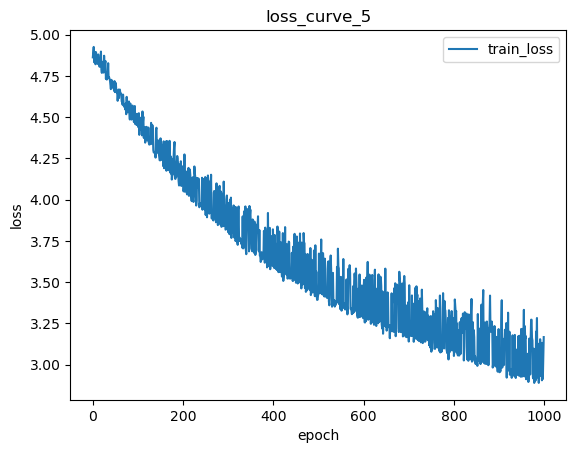

In [5]:
plt.figure()
plt.plot(losses, label='train_loss')
plt.title(f'loss_curve_{n}')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.savefig(f'figures/{label_name}_{n}.png')

# Evaluate the model
Compute the confusion matrix on the train and test dataset and print out the accuracy and plot the confusion matrix.

[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 2, 0, 5, 0, 0, 0, 0, 0, 0, 0], [3, 0, 0, 12, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 9, 4, 0, 0, 0, 0, 0, 0], [1, 1, 0, 4, 3, 4, 2, 0, 0, 0, 2], [0, 1, 0, 2, 1, 2, 2, 2, 3, 2, 0], [0, 0, 0, 0, 0, 0, 1, 1, 5, 0, 3], [0, 0, 0, 0, 0, 0, 0, 0, 7, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]
Accuracy for class 0 = 100.0%
Accuracy for class 1 = 100.0%
Accuracy for class 2 = 0.0%
Accuracy for class 3 = 80.0%
Accuracy for class 4 = 25.0%
Accuracy for class 5 = 23.529411764705884%
Accuracy for class 6 = 13.333333333333334%
Accuracy for class 7 = 10.0%
Accuracy for class 8 = 87.5%
Accuracy for class 9 = 100.0%
Accuracy for class 10 = 100.0%
Overall accuracy = 39.583333333333336%


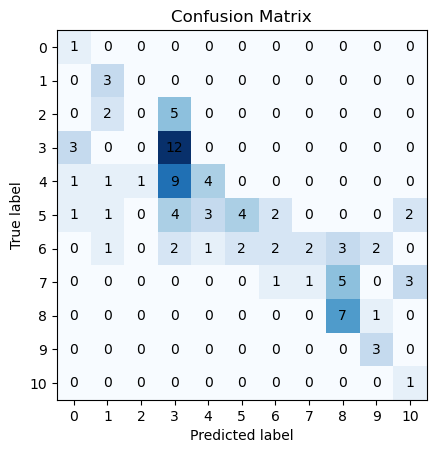

In [6]:
confustion_matrix = evaluate_model(model, training_dataset)
print(confustion_matrix)
confustion_matrix.print_accuracy()
confustion_matrix.plot()

# Plot model weights and connections.
Plot the model weights and connections in order to attempt to interpret what the model is learning.

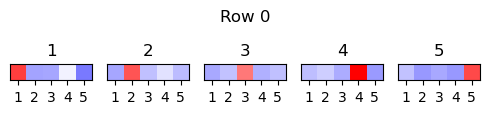

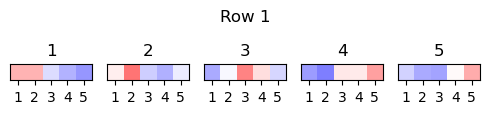

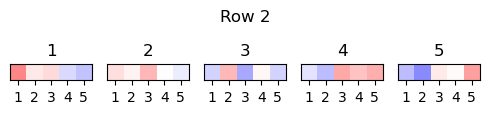

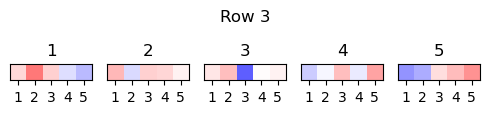

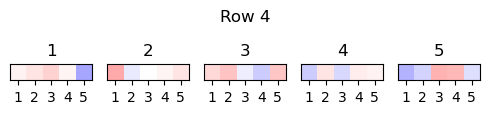

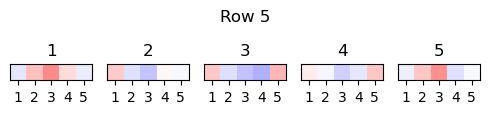

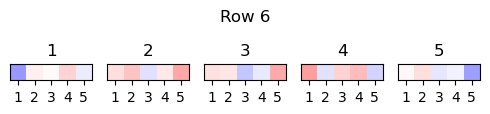

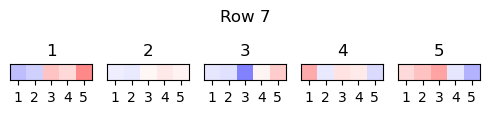

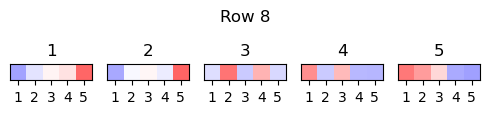

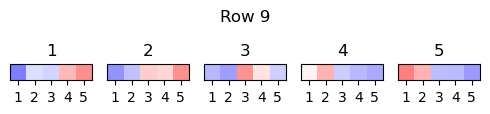

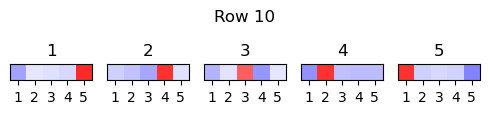

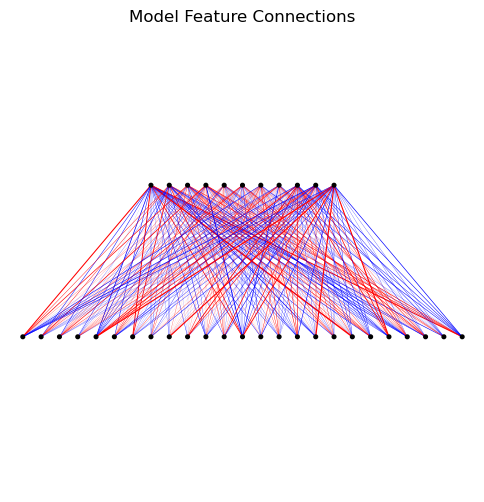

In [7]:
for i in range(len(layers)):
    for index in range(model.layers[i].weight.shape[0]):
        model.plot_heatmap_feature(i, index)
model.plot_connections()